In [15]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-deep')

file_path = 'data/processed/propiedades_procesado_FINAL.csv'
df = pd.read_csv(file_path, sep=';')



In [2]:
df.head()

,origen_archivo,url_publicacion,tipo_propiedad,sup_total,sup_cubierta,ambientes,banos,toilettes,cocheras,dormitorios,antiguedad_anos,dias_publicado,apto_credito,permite_mascotas,apto_profesional,parrilla,dormitorio_en_suite,patio,barrio,direccion,moneda,precio,expensas,latitud,longitud,flag_terraza,flag_quincho,flag_luminoso,flag_sotano,flag_pileta,flag_lavadero,flag_subte,flag_a_reciclar
0,propiedad_000bcf9916aacc4df5d7f81e7f67ab47.html,https://www.zonaprop.com.ar/propiedades/clasif...,Casa,375.0,455.0,5,2,0,4,4,20,29.0,0,0,0,1,0,1,Saavedra,Deheza 2900,USD,495000.0,0.0,-34.543159,-58.479141,0,1,0,0,0,0,0,0
1,propiedad_008aeddd1e0262c325a2473131e46b63.html,https://www.zonaprop.com.ar/propiedades/clasif...,PH,74.0,56.0,4,2,0,0,2,45,17.0,0,0,0,0,0,1,Monte Castro,Santo Tomé 5200,USD,119000.0,0.0,-34.621326,-58.513872,1,1,0,0,0,0,0,0
2,propiedad_009fd79b263fca624a995daa2d458be5.html,https://www.zonaprop.com.ar/propiedades/clasif...,Casa,195.0,135.0,4,2,0,0,3,10,36.0,1,1,1,1,0,1,Flores,Pasaje Fabre 1250,USD,174000.0,0.0,-34.641965,-58.451622,1,1,1,1,0,1,1,1
3,propiedad_00acdee79b759a2554cf8176beeab0b1.html,https://www.zonaprop.com.ar/propiedades/clasif...,PH,71.0,65.0,3,1,0,0,2,14,24.0,1,0,0,0,0,0,Monte Castro,Juan Agustín García 5100,USD,119000.0,119000.0,-34.625900,-58.505815,0,0,0,0,0,0,0,0
4,propiedad_00bc1a255f4f0a2d34b988798f846172.html,https://www.zonaprop.com.ar/propiedades/clasif...,PH,148.0,106.0,4,3,0,1,3,7,19.0,1,0,0,1,0,1,Caballito,José Mármol 900. Entre Av. san juan y Bidegain...,USD,250000.0,0.0,-34.624966,-58.424531,1,0,0,0,0,1,1,0


In [3]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4015 entries, 0 to 4014
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origen_archivo       4015 non-null   object 
 1   url_publicacion      4015 non-null   object 
 2   tipo_propiedad       4015 non-null   object 
 3   sup_total            4015 non-null   float64
 4   sup_cubierta         4015 non-null   float64
 5   ambientes            4015 non-null   int64  
 6   banos                4015 non-null   int64  
 7   toilettes            4015 non-null   int64  
 8   cocheras             4015 non-null   int64  
 9   dormitorios          4015 non-null   int64  
 10  antiguedad_anos      4015 non-null   int64  
 11  dias_publicado       3861 non-null   float64
 12  apto_credito         4015 non-null   int64  
 13  permite_mascotas     4015 non-null   int64  
 14  apto_profesional     4015 non-null   int64  
 15  parrilla             4015 non-null   i

In [4]:
print(df.describe())

          sup_total  sup_cubierta    ambientes        banos    toilettes  \
count  4.015000e+03  4.015000e+03  4015.000000  4015.000000  4015.000000   
mean   4.424063e+03  2.629287e+03     4.083437     1.798007     0.386052   
std    1.687894e+05  1.578161e+05     1.905271     1.307407     0.795418   
min    0.000000e+00  0.000000e+00     0.000000     0.000000     0.000000   
25%    8.500000e+01  6.500000e+01     3.000000     1.000000     0.000000   
50%    1.510000e+02  1.080000e+02     4.000000     1.000000     0.000000   
75%    2.440000e+02  1.760000e+02     5.000000     2.000000     1.000000   
max    1.000000e+07  1.000000e+07    28.000000    43.000000    35.000000   

          cocheras  dormitorios  antiguedad_anos  dias_publicado  \
count  4015.000000  4015.000000      4015.000000     3861.000000   
mean      0.551930     2.789041        38.980573       71.507123   
std       0.979221     1.570968        26.249543       85.482703   
min       0.000000     0.000000         0.0

In [5]:
print(df.isnull().sum())

origen_archivo           0
url_publicacion          0
tipo_propiedad           0
sup_total                0
sup_cubierta             0
ambientes                0
banos                    0
toilettes                0
cocheras                 0
dormitorios              0
antiguedad_anos          0
dias_publicado         154
apto_credito             0
permite_mascotas         0
apto_profesional         0
parrilla                 0
dormitorio_en_suite      0
patio                    0
barrio                   0
direccion                7
moneda                   0
precio                   0
expensas                 0
latitud                  7
longitud                 7
flag_terraza             0
flag_quincho             0
flag_luminoso            0
flag_sotano              0
flag_pileta              0
flag_lavadero            0
flag_subte               0
flag_a_reciclar          0
dtype: int64


In [6]:
df.precio.max()

np.float64(111111111.0)

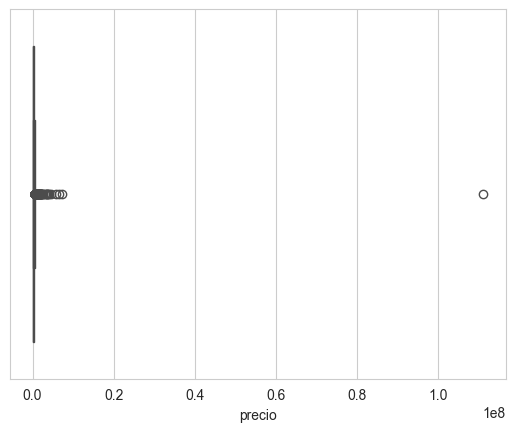

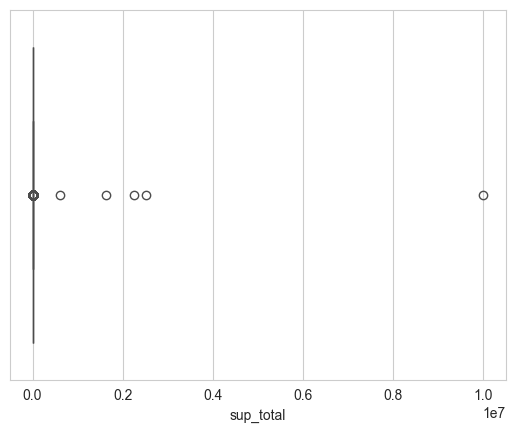

In [7]:
sns.boxplot(x=df['precio'])
plt.show()
sns.boxplot(x=df['sup_total'])
plt.show()

In [8]:
# quitamos outliers porque hay mucho ruido de malas publicaciones
# Verifico que las columnas 'precio' y 'sup_total' no tengan valores nulos o cero que afecten el cálculo
df_limpio = df[(df['precio'] > 0) & (df['sup_total'] > 0)].copy()

print(f"Número de propiedades después de eliminar precios o superficies en cero: {len(df_limpio)}")

# Calculolos límites del 1% y 99%
p_baja = df_limpio['precio'].quantile(0.01)
p_alta = df_limpio['precio'].quantile(0.99)
sup_baja = df_limpio['sup_total'].quantile(0.01)
sup_alta = df_limpio['sup_total'].quantile(0.99)

print(f"\nLímites para el filtrado:")
print(f"Precio: Entre USD {p_baja:,.2f} y USD {p_alta:,.2f}")
print(f"Superficie: Entre {sup_baja:,.2f} m² y {sup_alta:,.2f} m²")

df_filtrado = df_limpio[
    (df_limpio['precio'] >= p_baja) & (df_limpio['precio'] <= p_alta) &
    (df_limpio['sup_total'] >= sup_baja) & (df_limpio['sup_total'] <= sup_alta)
]

print(f"\nNúmero original de propiedades: {len(df)}")
print(f"Número de propiedades tras filtrar outliers: {len(df_filtrado)}")
print(f"Se eliminaron {len(df) - len(df_filtrado)} propiedades consideradas atípicas.")

Número de propiedades después de eliminar precios o superficies en cero: 3972

Límites para el filtrado:
Precio: Entre USD 54,710.00 y USD 1,250,000.00
Superficie: Entre 35.00 m² y 700.00 m²

Número original de propiedades: 4015
Número de propiedades tras filtrar outliers: 3841
Se eliminaron 174 propiedades consideradas atípicas.


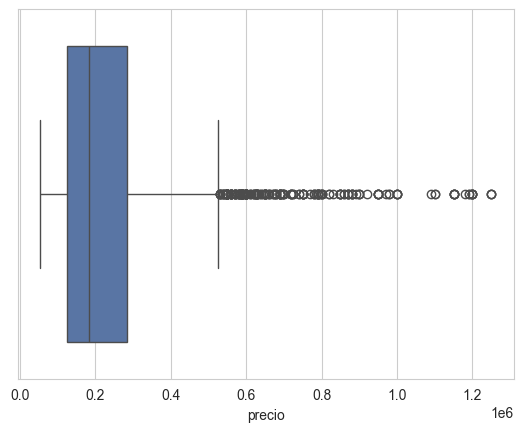

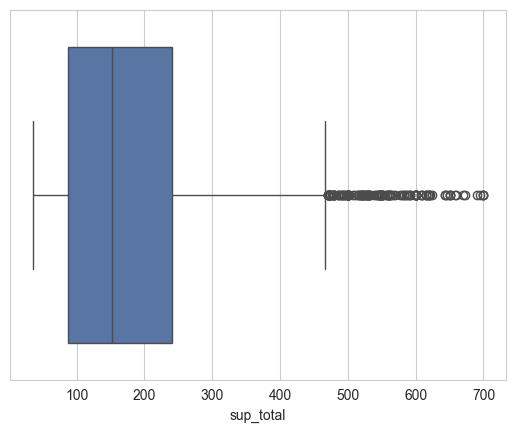

In [9]:
sns.boxplot(x=df_filtrado['precio'])
plt.show()
sns.boxplot(x=df_filtrado['sup_total'])
plt.show()

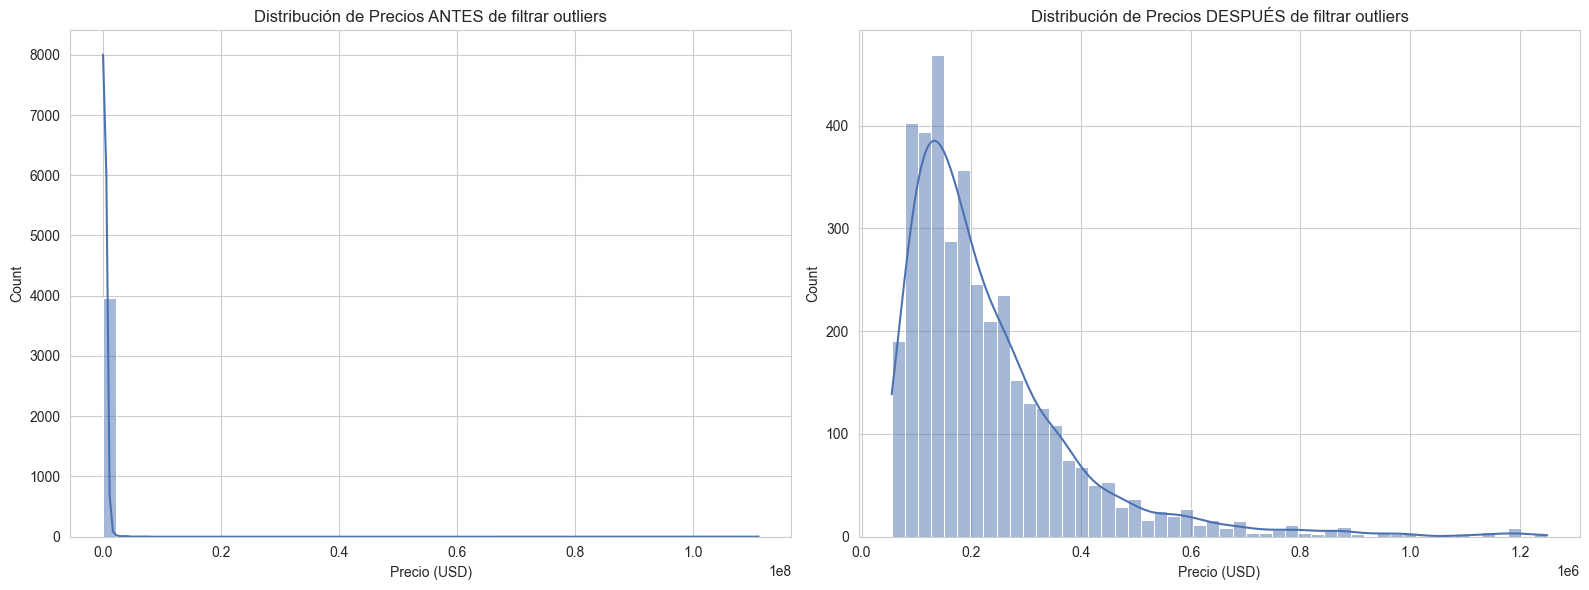

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma ANTES del filtrado
sns.histplot(df_limpio['precio'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribución de Precios ANTES de filtrar outliers')
axes[0].set_xlabel('Precio (USD)')

# Histograma DESPUÉS del filtrado
sns.histplot(df_filtrado['precio'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribución de Precios DESPUÉS de filtrar outliers')
axes[1].set_xlabel('Precio (USD)')

plt.tight_layout()
plt.show()

In [11]:
df_filtrado['precio_m2'] = df_filtrado['precio'] / df_filtrado['sup_total']

print("Se ha creado la columna 'precio_m2'. Aquí una muestra:")
print(df_filtrado[['precio', 'sup_total', 'precio_m2']].head())

print("\nEstadísticas descriptivas del Precio por m²:")
print(df_filtrado['precio_m2'].describe())

Se ha creado la columna 'precio_m2'. Aquí una muestra:
     precio  sup_total    precio_m2
0  495000.0      375.0  1320.000000
1  119000.0       74.0  1608.108108
2  174000.0      195.0   892.307692
3  119000.0       71.0  1676.056338
4  250000.0      148.0  1689.189189

Estadísticas descriptivas del Precio por m²:
count    3841.000000
mean     1417.988485
std       561.072202
min       222.634508
25%      1016.949153
50%      1360.975610
75%      1737.363636
max      5499.990000
Name: precio_m2, dtype: float64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_15232\3945195330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['precio_m2'] = df_filtrado['precio'] / df_filtrado['sup_total']


C:\Users\Usuario\AppData\Local\Temp\ipykernel_15232\340978213.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=precio_m2_barrio.index, x=precio_m2_barrio.values, orient='h', palette='viridis')


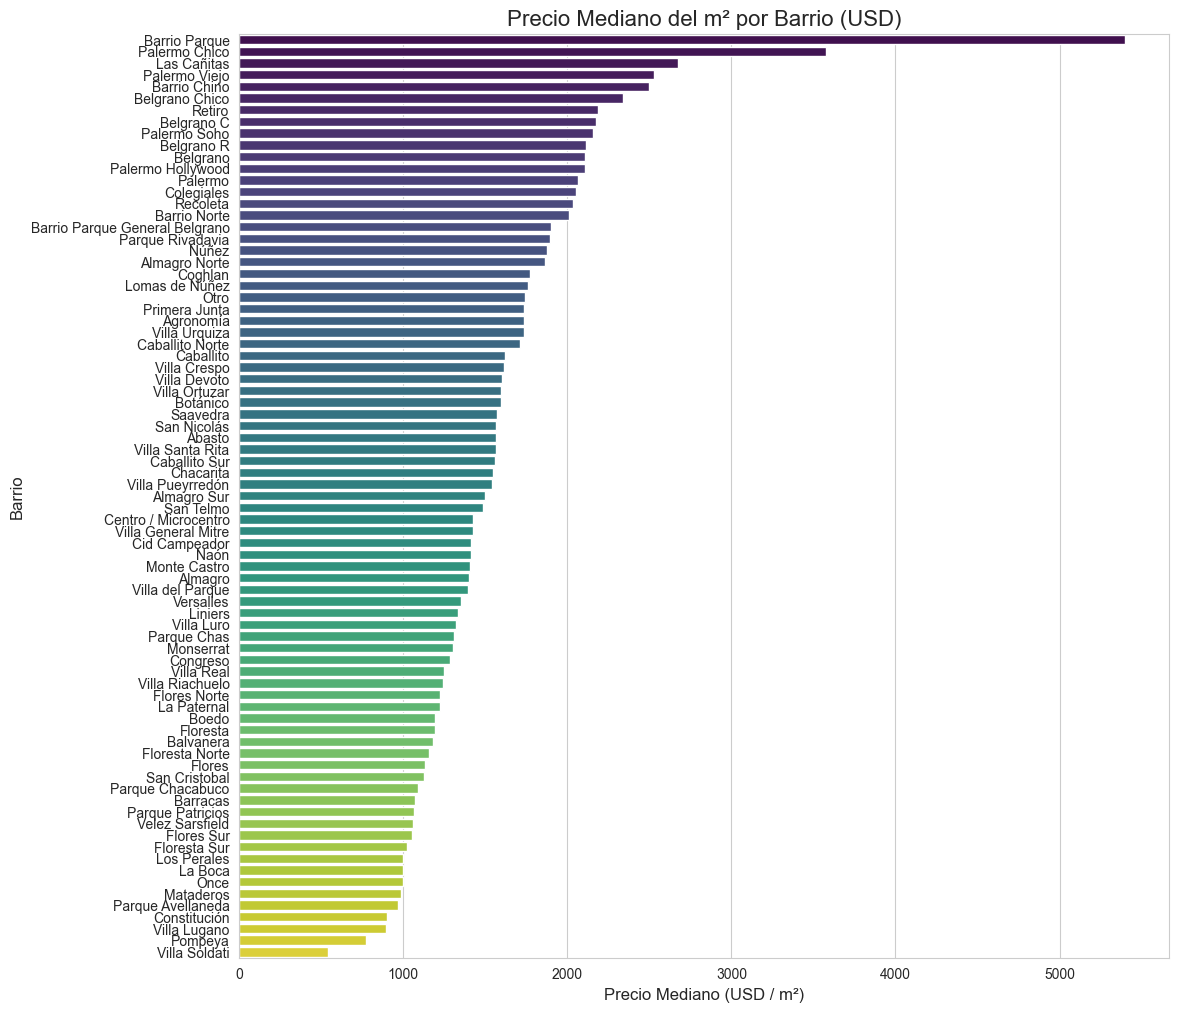

In [12]:
# Calculamos el precio mediano por m² para cada barrio
precio_m2_barrio = df_filtrado.groupby('barrio')['precio_m2'].median().sort_values(ascending=False)

plt.figure(figsize=(12, 12))
sns.barplot(y=precio_m2_barrio.index, x=precio_m2_barrio.values, orient='h', palette='viridis')
plt.title('Precio Mediano del m² por Barrio (USD)', fontsize=16)
plt.xlabel('Precio Mediano (USD / m²)', fontsize=12)
plt.ylabel('Barrio', fontsize=12)
plt.show()

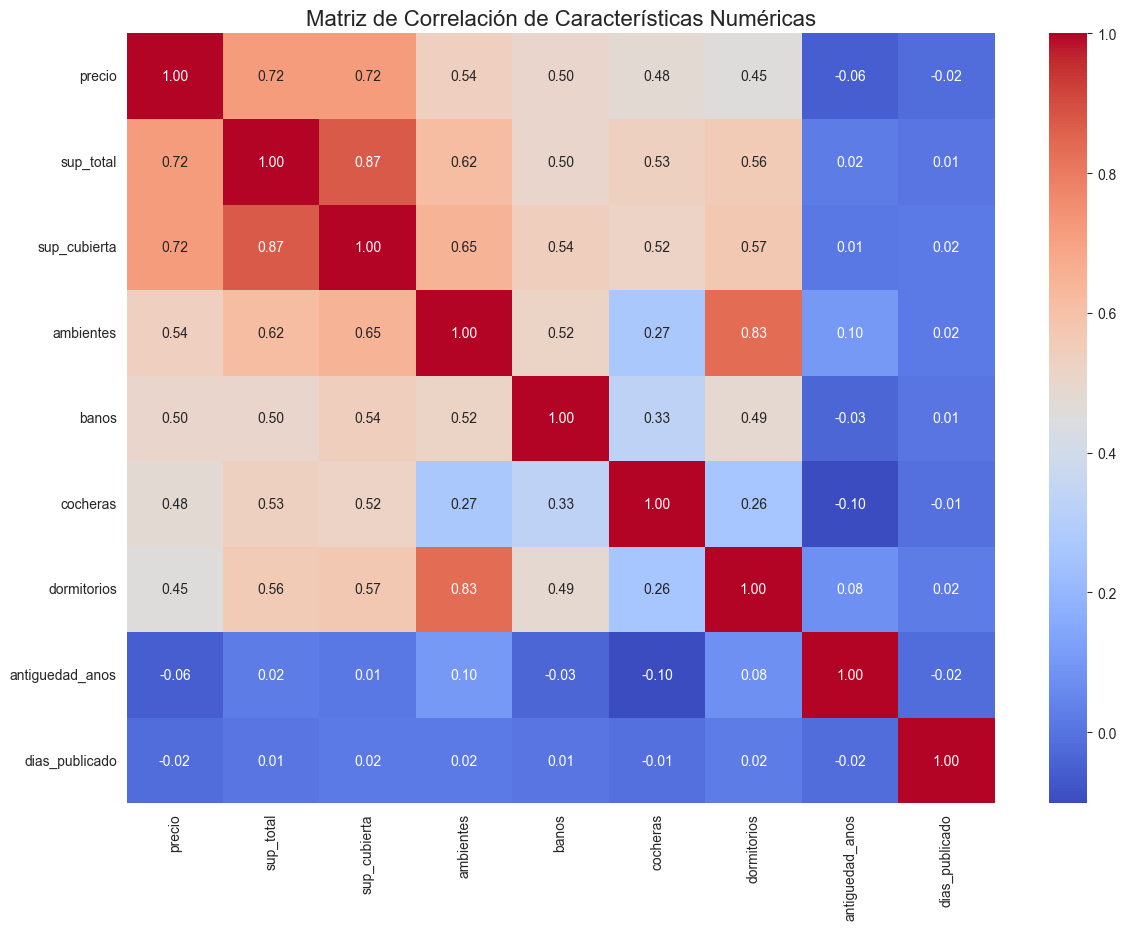

In [13]:
# --- Correlación de variables numéricas ---
columnas_numericas = ['precio', 'sup_total', 'sup_cubierta', 'ambientes', 'banos', 'cocheras', 'dormitorios', 'antiguedad_anos', 'dias_publicado']
matriz_corr = df_filtrado[columnas_numericas].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Características Numéricas', fontsize=16)
plt.show()

In [ ]:
# Creo el gráfico de dispersión
fig = px.scatter(
    df_filtrado,
    x="sup_total",
    y="precio",
    trendline="ols",
    hover_data=['barrio', 'precio_m2', 'url_publicacion', 'dias_publicado'],
    opacity=0.6,
    labels={"sup_total": "Superficie Total (m²)",
        "precio": "Precio (USD)"
    }
)

fig.update_layout(
    title={
        'text': "<b>Análisis de Oportunidades: Precio vs. Superficie</b><br><sup>Busca propiedades por debajo de la línea de tendencia azul</sup>",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    width=900,
    height=600
)

fig.show()

In [13]:
mapa_df = df_filtrado.dropna(subset=['latitud', 'longitud']).copy()

mapa_df['latitud'] = pd.to_numeric(mapa_df['latitud'])
mapa_df['longitud'] = pd.to_numeric(mapa_df['longitud'])

# mapa centrado en Buenos Aires
mapa_puntos = folium.Map(location=[mapa_df['latitud'].mean(), mapa_df['longitud'].mean()], zoom_start=12)

# 1 punto (marcador) por cada propiedad
for index, row in mapa_df.iterrows():
    # texto que aparecerá al hacer clic en el punto
    popup_text = f"""
    <b>Barrio:</b> {row['barrio']}<br>
    <b>Precio:</b> USD {row['precio']:,.0f}<br>
    <b>Precio/m²:</b> USD {row['precio_m2']:,.0f}<br>
    <a href="{row['url_publicacion']}" target="_blank">Ver Publicación</a>
    """
    
    folium.Marker(
        location=[row['latitud'], row['longitud']],
        popup=popup_text,
        tooltip=f"USD {row['precio_m2']:,.0f}/m²" # Texto que aparece al pasar el mouse
    ).add_to(mapa_puntos)

# guarda HTML
mapa_puntos.save('mapa_de_puntos.html')

print("Mapa 'mapa_de_puntos.html' creado. Ábrelo en tu navegador para explorarlo.")

Mapa 'mapa_de_puntos.html' creado. Ábrelo en tu navegador para explorarlo.


In [14]:
from folium.plugins import HeatMap

mapa_calor = folium.Map(location=[mapa_df['latitud'].mean(), mapa_df['longitud'].mean()], zoom_start=12)

# Creamos los datos para el mapa de calor: [latitud, longitud, peso]
# Uso el precio_m2 como el "peso" o la "intensidad" del calor.
heat_data = [[row['latitud'], row['longitud'], row['precio_m2']] for index, row in mapa_df.iterrows()]

HeatMap(heat_data, radius=15, blur=20).add_to(mapa_calor)

mapa_calor.save('mapa_calor_precios.html')
print("Mapa 'mapa_calor_precios.html' creado ok.")
# mapa_calor

Mapa 'mapa_calor_precios.html' creado. Ábrelo en tu navegador.


In [ ]:
# path mapa barrios de CABA
geojson_path = 'data/barrios.geojson'

precio_m2_barrio_mapa = df_filtrado.groupby('barrio')['precio_m2'].median().reset_index()
precio_m2_barrio_mapa['barrio'] = precio_m2_barrio_mapa['barrio'].str.upper()

# Cargo el GeoJSON y normalizo el nombre del barrio a mayúsculas
with open(geojson_path, 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

for feature in geojson_data['features']:
    feature['properties']['nombre'] = str(feature['properties']['nombre']).upper()

# Creo mapa base
mapa_coropletico = folium.Map(location=[-34.6037, -58.4371], zoom_start=12)

cp = folium.Choropleth(
    geo_data=geojson_data,
    name='choropleth',
    data=precio_m2_barrio_mapa,
    columns=['barrio', 'precio_m2'],
    key_on='feature.properties.nombre',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name='Precio Mediano del m² (USD)',
    highlight=True
).add_to(mapa_coropletico)

folium.features.GeoJsonTooltip(
    fields=['nombre', 'comuna'], 
    aliases=['Barrio:', 'Comuna:'],
    style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
).add_to(cp.geojson)

folium.LayerControl().add_to(mapa_coropletico)

mapa_coropletico.save('mapa_coropletico_barrios.html')
print("Mapa 'mapa_coropletico_barrios.html' creado ok.")


Mapa 'mapa_coropletico_barrios.html' creado. ¡Este es el definitivo!
